In [2]:
#Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import ast
import seaborn as sns
from datasets import load_dataset

#Load data
dataset = load_dataset("lukebarousse/data_jobs")
df = dataset['train'].to_pandas()

#Data cleaning
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [3]:
df_US = df[df['job_country'] == 'United States'].dropna(subset = ['salary_year_avg'])

In [13]:
job_titles = df_US['job_title_short'].value_counts().index[:6].tolist()

In [14]:
df_US_top = df_US[df_US['job_title_short'].isin(job_titles)]

In [17]:
job_ranking = df_US_top.groupby('job_title_short')['salary_year_avg'].median().sort_values(ascending=False).index

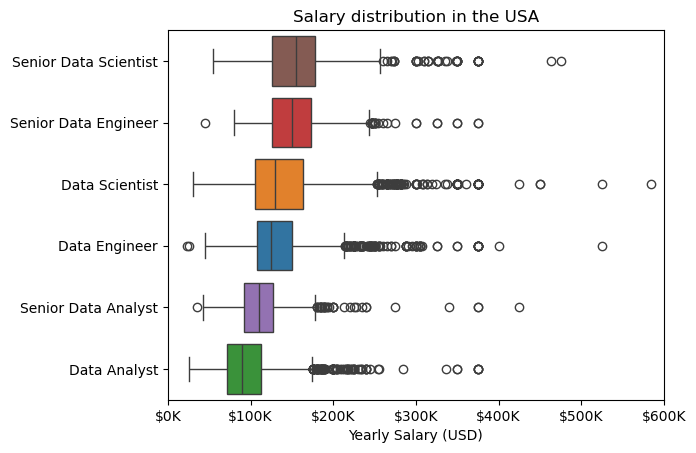

In [20]:
sns.boxplot(data=df_US_top, x = 'salary_year_avg', y = 'job_title_short', hue = 'job_title_short', order = job_ranking)
plt.title('Salary distribution in the USA')
plt.xlabel('Yearly Salary (USD)')
plt.ylabel('')
ax = plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'${int(x/1000)}K'))
plt.xlim(0,600000)
plt.show()

In [4]:
df_DA_US = df[(df['job_title_short'] == 'Data Analyst') & (df['job_country'] == 'United States')].copy()
df_DA_US= df_DA_US.dropna(subset = ['salary_year_avg'])

In [5]:
df_DA_US = df_DA_US.explode('job_skills')

In [6]:
df_DA_top_pay = df_DA_US.groupby('job_skills')['salary_year_avg'].agg(['count', 'median']).sort_values(by = 'median', ascending=False)

In [ ]:
df_DA_top_pay = df_DA_top_pay.head(10)


In [29]:
df_DA_top_skills = df_DA_US.groupby('job_skills')['salary_year_avg'].agg(['count', 'median']).sort_values(by = 'count', ascending = False).head(10).sort_values(by = 'median', ascending=False).head(10)

In [30]:
df_DA_top_skills


,count,median
job_skills,,
python,1431,97500.00
tableau,1364,92875.00
r,893,92500.00
sql server,286,92500.00
sql,2508,91000.00
sas,926,90000.00
power bi,838,90000.00
powerpoint,462,85000.00
excel,1808,84392.00


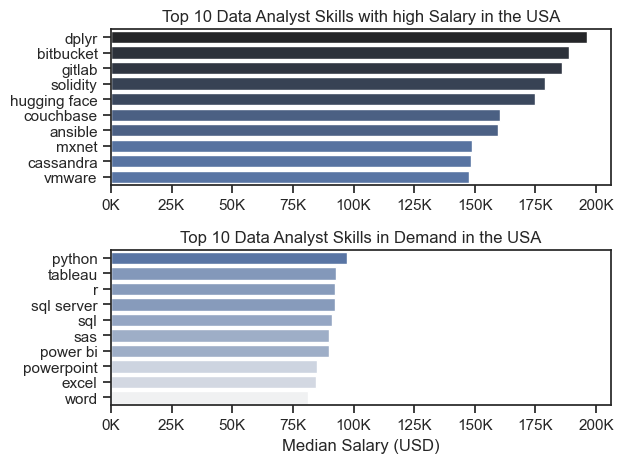

In [31]:
fig, ax = plt.subplots(2,1)

sns.set_theme(style = 'ticks')

sns.barplot(data = df_DA_top_pay, x = 'median', y = df_DA_top_pay.index, ax = ax[0], hue = 'median', palette = 'dark:b_r', legend = False)
#df_DA_top_pay.plot(kind = 'barh', y = 'median_salary', ax = ax[0], legend =False)
#ax[0].invert_yaxis()
ax[0].set_title('Top 10 Data Analyst Skills with high Salary in the USA')
ax[0].set_ylabel('')
ax[0].set_xlabel('')
ax[0].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'{int(x/1000)}K'))

sns.barplot(data = df_DA_top_skills, x = 'median', y = df_DA_top_skills.index, ax = ax[1], hue = 'median', palette = 'light:b', legend = False)


#df_DA_top_skill.plot(kind = 'barh', y = 'median_salary', ax = ax[1], legend =False)
#ax[1].invert_yaxis()
ax[1].set_xlim(ax[0].get_xlim())
ax[1].set_title('Top 10 Data Analyst Skills in Demand in the USA')
ax[1].set_ylabel('')
ax[1].set_xlabel('Median Salary (USD)')
ax[1].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'{int(x/1000)}K'))

plt.tight_layout()
plt.show()